In [1]:
from image_loader import ImageLoader
from tree_reviewer import TreeReviewer
from models.mask_extractor_sam import MaskExtractorSAM
from models.monocular_depth_dam import MonocularDepthDAM
from models.gdino_object_detector import GDinoObjectDetector

### Step 1: Define The Chosen Strategies 
The models take some time to load is best to load them before the rest of the application

In [2]:
# Define the models
mask_extractor = MaskExtractorSAM()
depth_mapper = MonocularDepthDAM()
object_classifier = GDinoObjectDetector()

In [3]:

from strategies.tree.tree_segmentation_strategy import TreeSegmentationStrategy
from strategies.card.card_segmentation_strategy import CardSegmentationStrategy

tree_segmentation_strategy = TreeSegmentationStrategy(mask_extractor, 
                                                    depth_mapper, 
                                                    object_classifier)
card_segmentation_strategy = CardSegmentationStrategy(mask_extractor, 
                                                    object_classifier)

### Step 2: Define The Tree Reviewer

In [4]:
folder_path = "C:/Users/jflir/Documents/Arbocensus/ArbocensusData/20230829_24/"
image_loader = ImageLoader(folder_path)
tree_reviewer = TreeReviewer(tree_segmentation_strategy, card_segmentation_strategy)

In [5]:
count = 0

# image = next(image_loader.load_image(image_file='23357-0.jpg'))
image = next(image_loader.load_image(image_file='78028-0.jpg'))
# tree_validation_result = tree_reviewer.review_tree(image, plot=True)

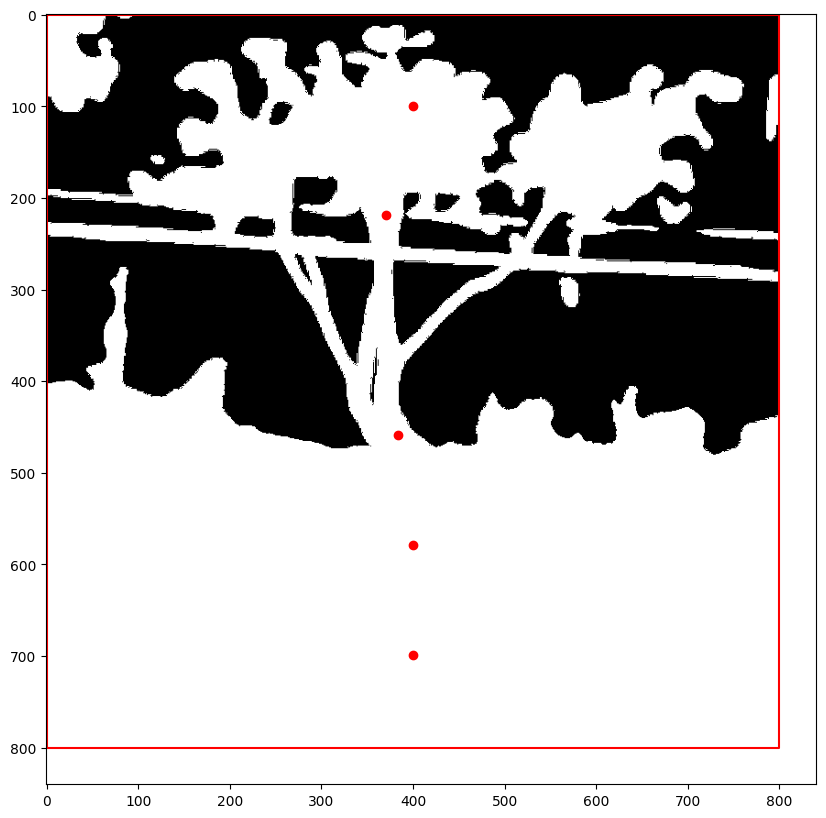

In [6]:
depth_mask = depth_mapper.get_depth_mask(image)
depth_mask.display_mask(with_points=True, with_bbox=True)

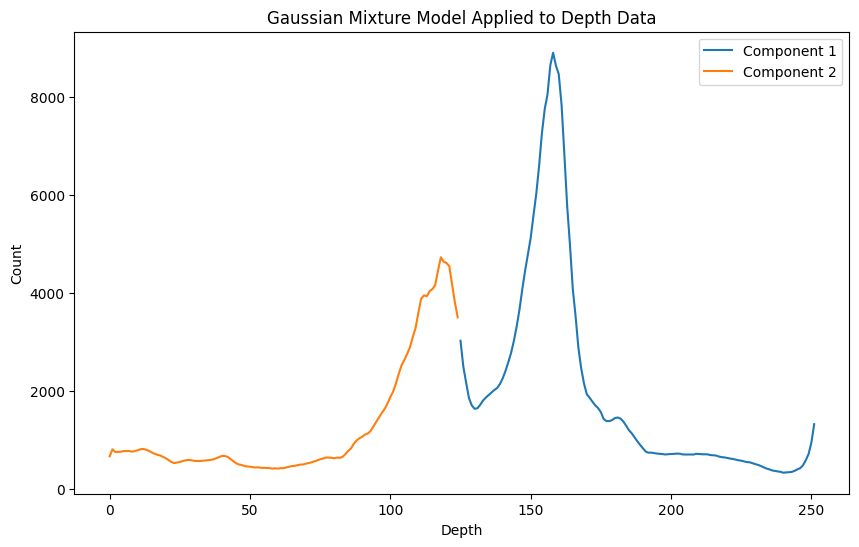

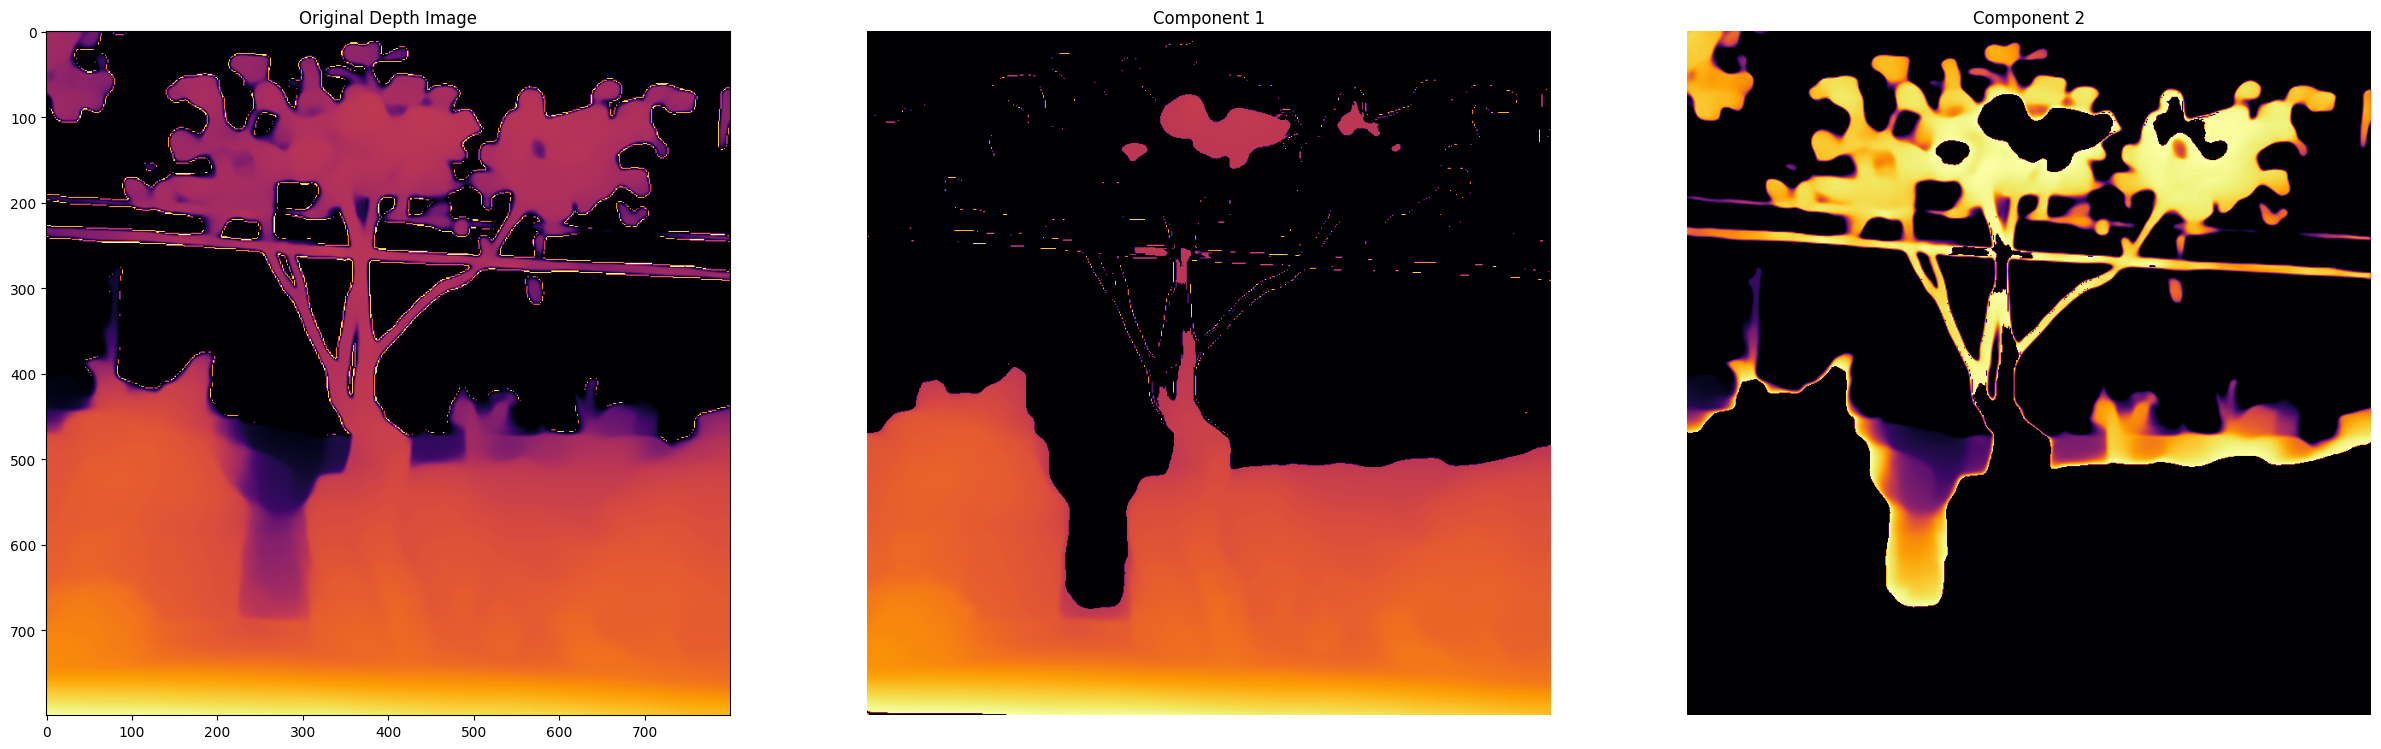

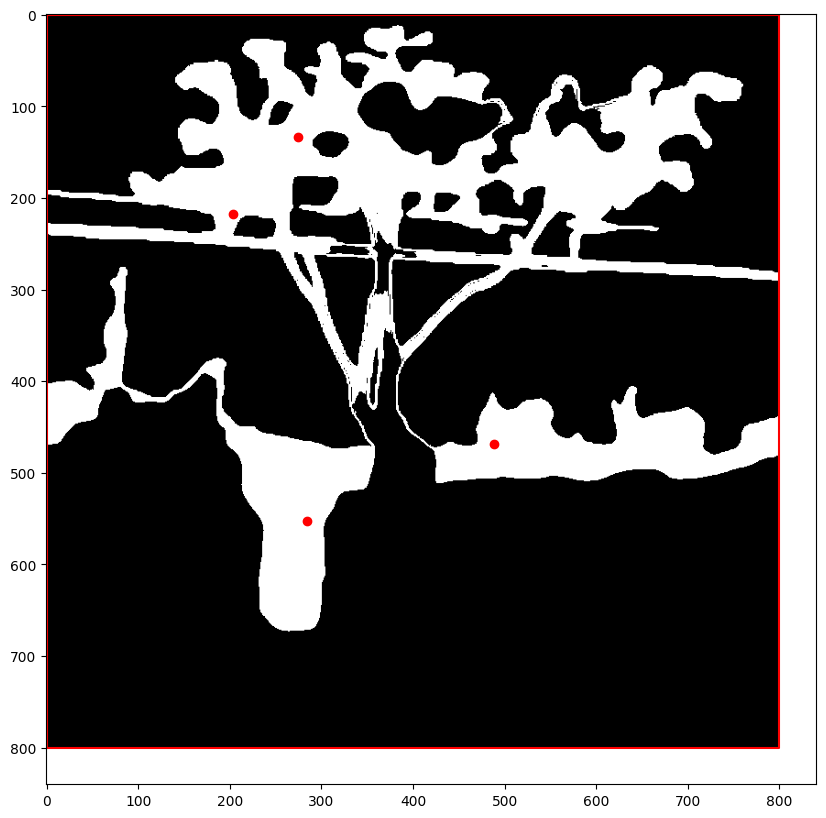

In [7]:
depth_mask = depth_mapper.isolate_tree_depth(image, plot=True)
depth_mask.display_mask(with_points=True, with_bbox=True)